## K means Algorithm

#### Importing Data 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.cluster import KMeans

In [7]:
songs_df = pd.read_csv('spotify_songs.csv')

In [8]:
songs_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [9]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column                                                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                                                             --------------  -----  
 0   Unnamed: 0                                                                                                                                                                         5235 non-null   int64  
 1   name                                                                                                                                                                               5235 non-null   object 
 2   artist                                                  

### Data Cleaning

In [11]:
songs_df.columns = songs_df.columns.str.strip()

In [12]:
songs_df.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [13]:
songs_df.drop(columns=['Unnamed: 0', 'type', 'duration_ms', 'id', 'html','key','mode','time_signature','instrumentalness','valence'], inplace=True)

In [14]:
songs_df

,name,artist,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,-13.141,0.0705,0.694,0.9750,110.376
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,-12.646,0.0346,0.217,0.1070,125.039
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,-11.048,0.3470,0.453,0.1240,93.698
3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,-18.115,0.0471,0.879,0.3860,106.802
4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,-19.807,0.0380,0.916,0.1040,120.941
...,...,...,...,...,...,...,...,...,...
5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.0473,0.917,0.0832,87.906
5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,-21.873,0.0442,0.855,0.0694,83.134
5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,-42.959,0.0434,0.951,0.0772,71.573
5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,-29.443,0.0419,0.883,0.1110,67.109


In [15]:
songs_df.set_index(['name','artist'], inplace = True)

In [16]:
songs_df

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,-13.141,0.0705,0.694,0.9750,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,-12.646,0.0346,0.217,0.1070,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,-11.048,0.3470,0.453,0.1240,93.698
Mulher Eu Sei,Chico César,0.7050,0.05020,-18.115,0.0471,0.879,0.3860,106.802
Rosa Morena,Kurt Elling,0.6510,0.11900,-19.807,0.0380,0.916,0.1040,120.941
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.0473,0.917,0.0832,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,0.0442,0.855,0.0694,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,0.0434,0.951,0.0772,71.573


In [17]:
songs_df.duplicated().value_counts()

False    5160
True       75
Name: count, dtype: int64

In [18]:
songs_df.duplicated()

name                                                                                                                                                                               artist                                          
Se Eu Quiser Falar Com Deus                                                                                                                                                        Gilberto Gil                                        False
Saudade De Bahia                                                                                                                                                                   Antônio Carlos Jobim                                False
Canta Canta, Minha Gente                                                                                                                                                           Martinho Da Vila                                    False
Mulher Eu Sei                                                

In [19]:
songs_df.loc[songs_df.duplicated()]

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
name,artist,,,,,,,
Já Sei Namorar - 2004 Digital Remaster,Tribalistas,0.670,0.822,-6.687,0.0570,0.670000,0.1320,145.560
Berekerê - Voice,Geraldo Azevedo,0.434,0.573,-11.203,0.0666,0.830000,0.0584,172.189
Se eu quiser falar com Deus - Ao vivo,Gilberto Gil,0.658,0.259,-13.141,0.0705,0.694000,0.9750,110.376
It Wasn't Me,Shaggy,0.853,0.606,-4.596,0.0713,0.056100,0.3130,94.759
Do You Believe in Magic?,The Lovin' Spoonful,0.553,0.738,-7.963,0.0457,0.213000,0.3390,138.602
...,...,...,...,...,...,...,...,...
"Hey Mama (feat. Nicki Minaj, Bebe Rexha & Afrojack)",David Guetta,0.596,0.730,-4.091,0.1510,0.240000,0.3250,85.979
Hot Right Now - Radio Edit,DJ Fresh,0.524,0.972,-1.569,0.0431,0.006560,0.2240,175.017
You Can Get It If You Really Want,Jimmy Cliff,0.894,0.559,-8.547,0.0568,0.248000,0.0762,128.164


In [20]:
songs_df.drop_duplicates(inplace=True)

In [21]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5160 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  5160 non-null   float64
 1   energy        5160 non-null   float64
 2   loudness      5160 non-null   float64
 3   speechiness   5160 non-null   float64
 4   acousticness  5160 non-null   float64
 5   liveness      5160 non-null   float64
 6   tempo         5160 non-null   float64
dtypes: float64(7)
memory usage: 552.2+ KB


In [22]:
songs_df.isnull().count()

danceability    5160
energy          5160
loudness        5160
speechiness     5160
acousticness    5160
liveness        5160
tempo           5160
dtype: int64

In [23]:
songs_df

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.6580,0.25900,-13.141,0.0705,0.694,0.9750,110.376
Saudade De Bahia,Antônio Carlos Jobim,0.7420,0.39900,-12.646,0.0346,0.217,0.1070,125.039
"Canta Canta, Minha Gente",Martinho Da Vila,0.8510,0.73000,-11.048,0.3470,0.453,0.1240,93.698
Mulher Eu Sei,Chico César,0.7050,0.05020,-18.115,0.0471,0.879,0.3860,106.802
Rosa Morena,Kurt Elling,0.6510,0.11900,-19.807,0.0380,0.916,0.1040,120.941
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,-23.390,0.0473,0.917,0.0832,87.906
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,-21.873,0.0442,0.855,0.0694,83.134
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,-42.959,0.0434,0.951,0.0772,71.573


In [24]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5160 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  5160 non-null   float64
 1   energy        5160 non-null   float64
 2   loudness      5160 non-null   float64
 3   speechiness   5160 non-null   float64
 4   acousticness  5160 non-null   float64
 5   liveness      5160 non-null   float64
 6   tempo         5160 non-null   float64
dtypes: float64(7)
memory usage: 552.2+ KB


In [25]:
songs_df.describe()

,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,0.507423,0.653254,-9.381235,0.083139,0.291448,0.185377,118.662623
std,0.218208,0.289543,6.317773,0.070987,0.356934,0.149291,28.604579
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.475000,-11.385250,0.038900,0.002265,0.092500,96.069750
50%,0.536000,0.738000,-7.362500,0.055700,0.096100,0.125000,119.011500
75%,0.686250,0.895000,-5.301000,0.098800,0.570250,0.237000,134.048000
max,0.967000,1.000000,1.342000,0.918000,0.996000,0.987000,213.990000


### Data Scaling

### Min max scaler

In [28]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") 

# Scale the songs_df DataFrame
songs_df_minmax = scaler.fit_transform(songs_df)
songs_df_minmax

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.763897,0.076797,0.696787,0.987842,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.771967,0.037691,0.217871,0.108409,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.798018,0.377996,0.454819,0.125633,0.437862
Mulher Eu Sei,Chico César,0.729059,0.05020,0.682811,0.051307,0.882530,0.391084,0.499098
Rosa Morena,Kurt Elling,0.673216,0.11900,0.655228,0.041394,0.919679,0.105370,0.565171
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,0.051525,0.920683,0.084296,0.410795
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.621548,0.048148,0.858434,0.070314,0.388495
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.277803,0.047277,0.954819,0.078217,0.334469


In [29]:
# Display column of original DataFrame  column of MinMaxed DataFrame to compare
pd.DataFrame({
    'original': songs_df.iloc[:,-1],
    'min_max_scale': songs_df_minmax.iloc[:,-1]
}).sort_values(by='original')

,,original,min_max_scale
name,artist,,
Shake It Off,Taylor Swift,0.000,0.000000
"French Suite No. 5 in G Major, BWV 816: I. Allemande",Johann Sebastian Bach,34.856,0.162886
Immortal Coil,Morpheus Descends,42.817,0.200089
Sunset Monet,Hauschka,49.654,0.232039
I Got It Bad And That Ain't Good,Oscar Peterson Trio,49.689,0.232202
...,...,...,...
Ready Teddy,Little Richard,205.973,0.962536
(Sittin' On) the Dock of the Bay,Otis Redding,205.981,0.962573
Rebel Rouser,Duane Eddy,206.313,0.964124


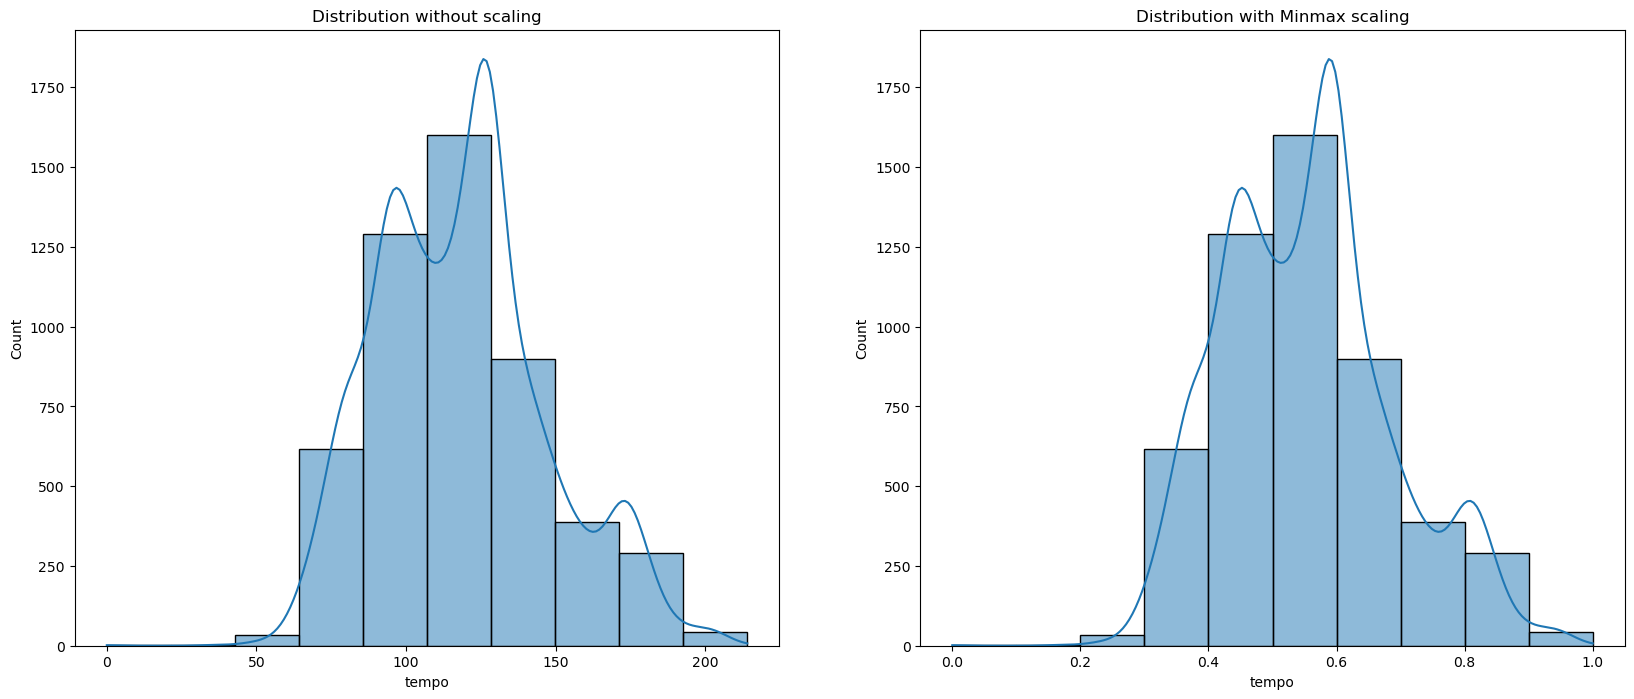

In [30]:
# Stating that we want two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the two plots
sns.histplot(data=songs_df.iloc[:,-1], bins=10, kde=True, ax=ax1);
sns.histplot(songs_df_minmax.iloc[:,-1], bins=10, kde=True, ax=ax2);

# Adding titles to the plots
ax1.set_title('Distribution without scaling')
ax2.set_title('Distribution with Minmax scaling')

plt.show()

In [31]:
sample_5000 = songs_df.sample(10)

In [32]:
min_max_sample = songs_df_minmax.sample(10)

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


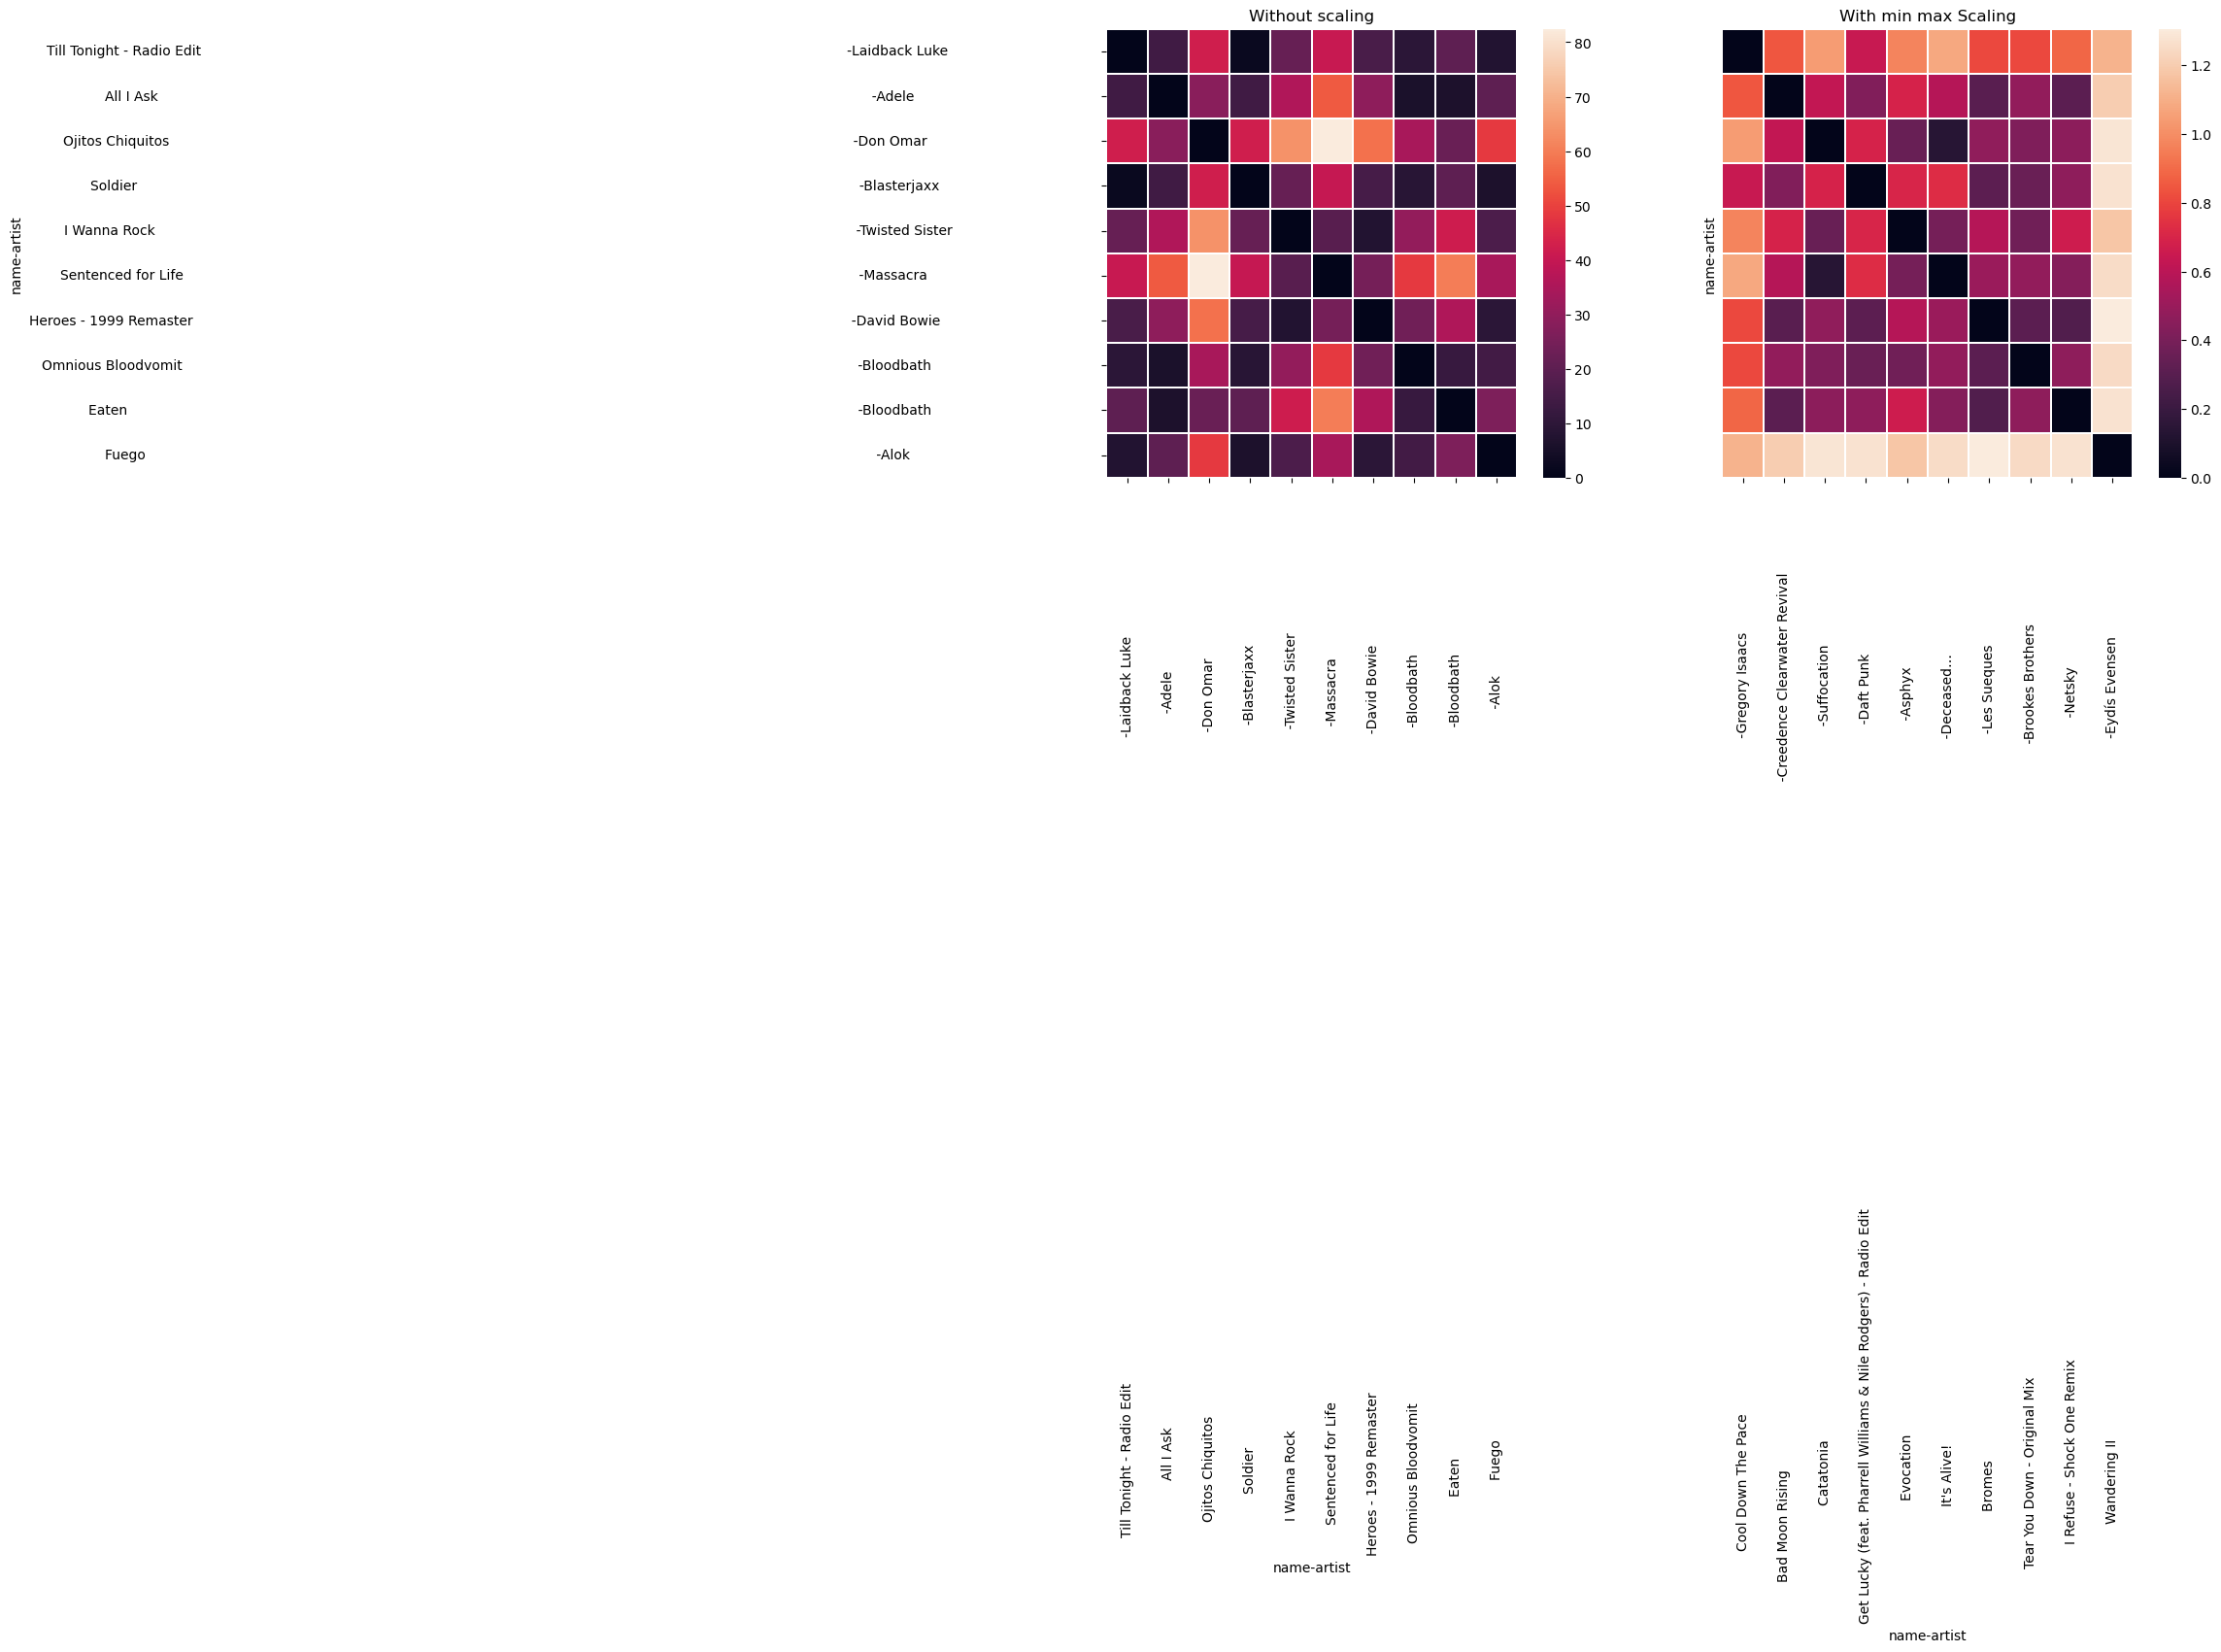

In [33]:
without_distances_df = pd.DataFrame(pairwise_distances(sample_5000),
                                index = sample_5000.index,
                                columns = sample_5000.index)


with_distances_df = pd.DataFrame(pairwise_distances(min_max_sample),
                                     index = min_max_sample.index,
                                     columns = min_max_sample.index)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), constrained_layout=True)

sns.heatmap(without_distances_df, ax=ax1, linewidths=.2);
sns.heatmap(with_distances_df, ax=ax2, linewidths=.2, yticklabels=False);


ax1.set_title("Without scaling")
ax2.set_title("With min max Scaling")

plt.show()
     

#### PCA (Principle Component Analysis)

In [35]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn import set_config
set_config(transform_output="pandas")

In [36]:
pca = PCA()

pca_fit = pca.fit(songs_df_minmax)

pca_basic_df = pca.transform(songs_df_minmax)

pca_basic_df

,,pca0,pca1,pca2,pca3,pca4,pca5,pca6
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.511680,-0.147677,0.782231,0.146789,-0.266472,-0.000358,-0.021304
Saudade De Bahia,Antônio Carlos Jobim,0.094959,-0.265148,-0.127848,0.022233,-0.211661,-0.027174,0.014185
"Canta Canta, Minha Gente",Martinho Da Vila,0.057407,-0.345541,0.022031,0.038880,0.219046,0.282290,0.083126
Mulher Eu Sei,Chico César,0.824983,-0.248884,0.219940,0.064315,-0.156590,0.006206,0.003026
Rosa Morena,Kurt Elling,0.831345,-0.198615,-0.030483,-0.061547,-0.041291,-0.000092,0.043465
...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.912140,0.253603,-0.105629,0.104407,-0.038654,0.015927,0.006488
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.844089,0.267644,-0.128460,0.129746,-0.034804,0.008778,-0.011992
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.051331,0.425958,-0.156887,0.215788,-0.109943,0.042239,0.262030


Identifying the most informative principal component

In [38]:
# Get the variance explained by each principal component
explained_variance_array = pca_fit.explained_variance_ratio_

explained_variance_array

array([0.64285276, 0.16105335, 0.07208468, 0.05413605, 0.0450129 ,
       0.01680827, 0.00805199])

#### Elbow method

The elbow method works by plotting the variance of each principal component against its index

In [40]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.642853
1,0.161053
2,0.072085
3,0.054136
4,0.045013
5,0.016808
6,0.008052


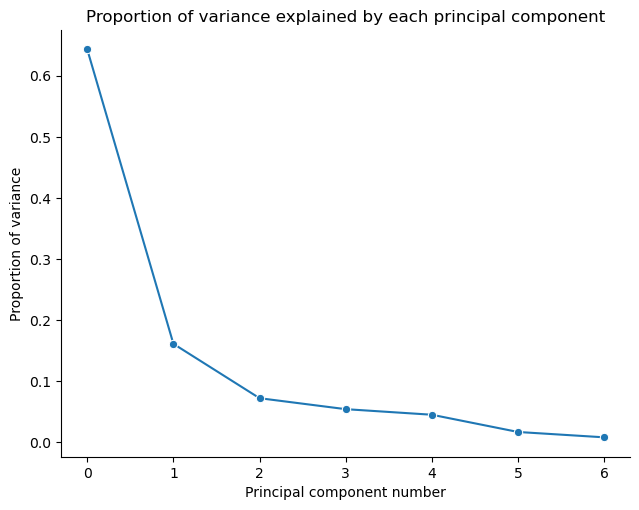

In [41]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [43]:
# Set the variable elbow to where you believe the elbow is
elbow = 5

### Cumulative explained variance

Cumulative explained variance Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

In [45]:
import numpy as np

In [46]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)

cumulative_sum_of_variance

array([0.64285276, 0.80390611, 0.87599079, 0.93012684, 0.97513974,
       0.99194801, 1.        ])

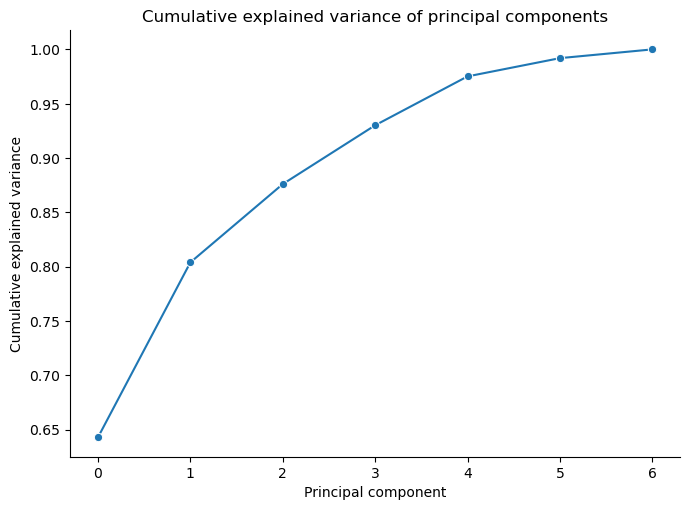

In [47]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);
     

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

Let's visualise this threshold


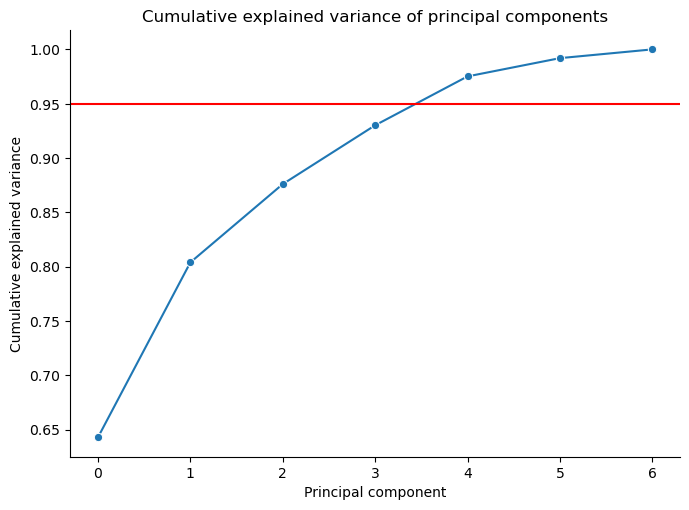

In [49]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');
     

Let's apply this to our minmax data

In [51]:
from sklearn.decomposition import PCA
     

# Create a PCA object
pca_variance = PCA(n_components = 0.95)
     

# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(songs_df_minmax)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,,pca0,pca1,pca2,pca3,pca4
name,artist,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.511680,-0.147677,0.782231,0.146789,-0.266472
Saudade De Bahia,Antônio Carlos Jobim,0.094959,-0.265148,-0.127848,0.022233,-0.211661
"Canta Canta, Minha Gente",Martinho Da Vila,0.057407,-0.345541,0.022031,0.038880,0.219046
Mulher Eu Sei,Chico César,0.824983,-0.248884,0.219940,0.064315,-0.156590
Rosa Morena,Kurt Elling,0.831345,-0.198615,-0.030483,-0.061547,-0.041291
...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.912140,0.253603,-0.105629,0.104407,-0.038654
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.844089,0.267644,-0.128460,0.129746,-0.034804
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,1.051331,0.425958,-0.156887,0.215788,-0.109943


### Analyzing K

#### Inertia & elbow method

In [53]:
# import pandas as pd

# from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# import seaborn as sns
import plotly.graph_objects as go

Inertia and the elbow method In clustering, inertia is a measure of how well data points fit into their assigned clusters. Lower inertia indicates a better fit. However, minimising inertia alone can lead to meaningless clusters, with each data point in its own cluster.

The elbow method is a visual aid for identifying the optimal number of clusters. It plots inertia values for different cluster numbers, revealing an "elbow" where the inertia reduction begins to plateau. This plateau indicates that reducing inertia further has little impact on cluster quality.

To find the inertia score for our clusters, we can use the KMeans attribute .inertia_.

We will cluster our song preferences data multiple times, starting with 1 cluster and increasing the number of clusters by 1 each time until we reach max_k. We will store the inertia score for each clustering in a list.

Once we've calculated the inertia scores for all values of k, we'll plot them on a line chart. We'll then look for the "elbow" in the line chart. The elbow is the point where the inertia score starts to plateau, indicating that adding more clusters is not significantly improving the quality of the clustering.

In [55]:
# Decide on a random_state to use
seed = 123

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(10, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(pca_variance_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

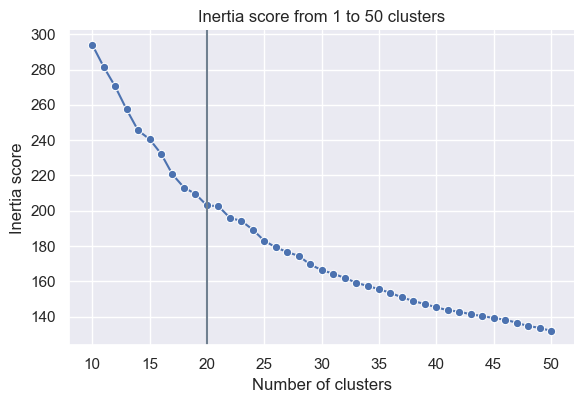

In [80]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 4,
            aspect = 1.5)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

# Add a vertical red line at 25 on the x axis for the minimum number required
plt.axvline(x = 20,
            color = 'slategrey');

The silhouette score
The silhouette score is another metric for evaluating the quality of clustering results. It measures how well each data point is assigned to its cluster, taking into account the distance to other clusters. The silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

The silhouette score can be used to identify the optimal number of clusters by clustering the data with different numbers of clusters and selecting the number of clusters that has the highest the silhouette score.

To calculate the silhouette score we'll use the SKLearn function silhouette_score.

In [58]:
# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(10, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = seed)

    # Fit the KMeans model to the scaled data
    kmeans.fit(pca_variance_df)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(pca_variance_df, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

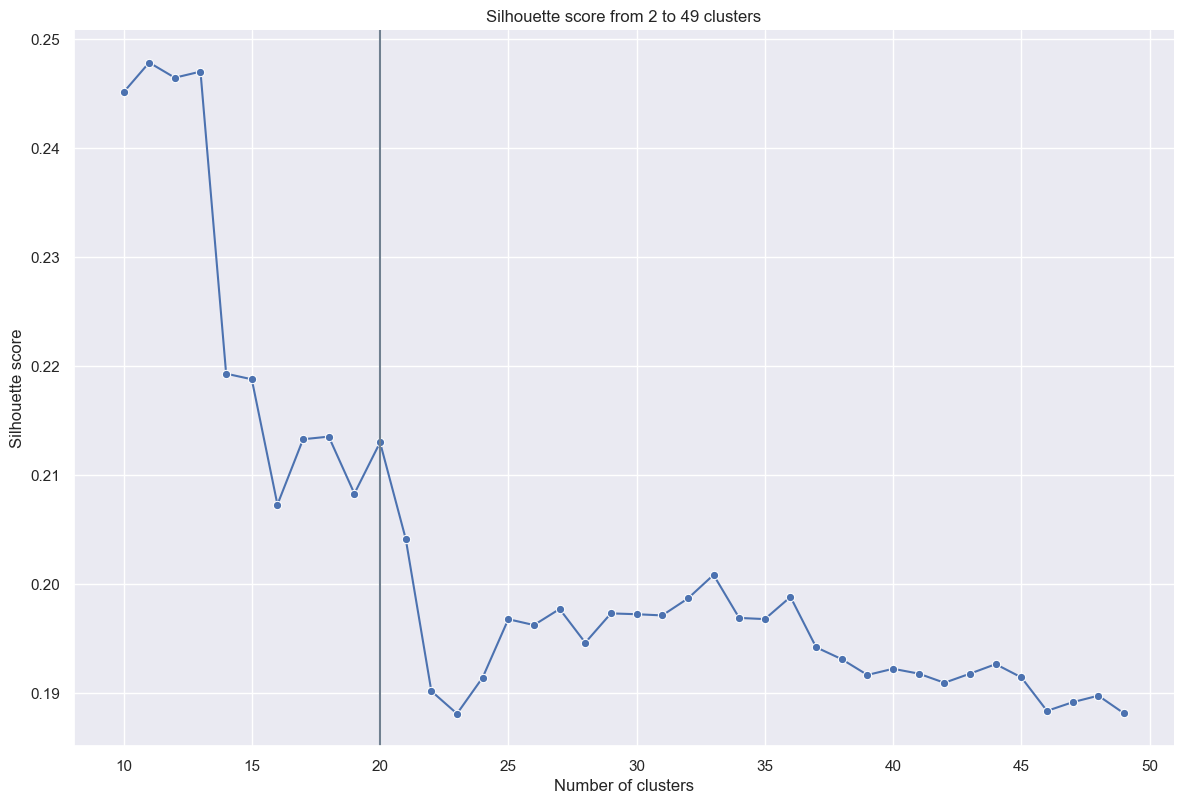

In [78]:
(
sns.relplot(y = sil_scores,
            x = range(10, max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 1.5)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

# Add a vertical red line at 25 on the x axis for the minimum number required
plt.axvline(x = 20,
            color = 'slategrey');

To determine the optimal number of clusters, we can look for the highest silhouette score. This score measures how well each point is assigned to its cluster, with higher scores indicating better clustering.

However, the highest silhouette score may not always be the best choice. For example, if the score is very high for a large number of clusters, it may be a sign that the clusters are too finely grained and that we are overfitting the data.

In addition, we should consider our business objectives and the data we are using. For example, if we are clustering customers based on their purchase history, we may want to choose a smaller number of clusters so that we can easily identify different customer segments.

Therefore, it's important to use the silhouette score in conjunction with other methods, such as the elbow method, and to consider our business objectives and the data we are using when choosing the optimal number of clusters.

You can also experiment with different values for random_state. It's possible that you got a "bad seed" and this is leading to misleading results. Make sure to use the same random_state for both the inertia and silhouette methods so that you are comparing the same clusters.

In [82]:
# Initialise the model
my_kmeans = KMeans(n_clusters = 25, # you always choose the number of k here
                   n_init = "auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(songs_df_minmax)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our original DataFrame
songs_df_minmax["cluster"] = clusters

In [84]:
songs_df_minmax

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,cluster
name,artist,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.25900,0.763897,0.076797,0.696787,0.987842,0.515800,24
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.39900,0.771967,0.037691,0.217871,0.108409,0.584322,7
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.73000,0.798018,0.377996,0.454819,0.125633,0.437862,4
Mulher Eu Sei,Chico César,0.729059,0.05020,0.682811,0.051307,0.882530,0.391084,0.499098,19
Rosa Morena,Kurt Elling,0.673216,0.11900,0.655228,0.041394,0.919679,0.105370,0.565171,19
...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.208893,0.06940,0.596818,0.051525,0.920683,0.084296,0.410795,16
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.194416,0.10100,0.621548,0.048148,0.858434,0.070314,0.388495,16
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.061634,0.00093,0.277803,0.047277,0.954819,0.078217,0.334469,16


In [86]:
songs_df_minmax.loc[songs_df_minmax['cluster'] == 2].sample(5)

,,danceability,energy,loudness,speechiness,acousticness,liveness,tempo,cluster
name,artist,,,,,,,,
No Se Si Fue,Arcangel,0.885212,0.534,0.806756,0.096841,0.301205,0.084600,0.430076,2
Ohne dich,TEY,0.857291,0.523,0.823416,0.059586,0.187751,0.170213,0.476676,2
Shake Ya Ass,Mystikal,0.945191,0.607,0.885886,0.348584,0.062851,0.052178,0.458218,2
I Knew You Were Waiting (For Me),George Michael,0.734230,0.639,0.768821,0.049020,0.230924,0.174265,0.504449,2
High,Lighthouse Family,0.686660,0.622,0.839474,0.027560,0.099799,0.113475,0.478256,2


In [88]:
songs_df_minmax.groupby(by="cluster").mean()

,danceability,energy,loudness,speechiness,acousticness,liveness,tempo
cluster,,,,,,,
0,0.322911,0.938895,0.855606,0.134093,0.006244,0.123631,0.528986
1,0.317835,0.268698,0.752565,0.043900,0.913195,0.164007,0.419012
2,0.805959,0.545122,0.839911,0.104377,0.100937,0.114977,0.520634
3,0.382454,0.049377,0.550748,0.054595,0.981776,0.107202,0.377903
4,0.767382,0.748217,0.882982,0.112570,0.345356,0.140081,0.480783
5,0.277697,0.924342,0.856668,0.115035,0.010383,0.392815,0.583356
6,0.472265,0.428992,0.810107,0.053208,0.705759,0.154690,0.683749
7,0.570755,0.473374,0.811976,0.048188,0.249989,0.144201,0.572675
8,0.713051,0.449674,0.811100,0.076280,0.522897,0.145945,0.518429


In [90]:
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

# State the label for each arm of the chart
categories = songs_df_minmax.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs_df_minmax['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[0]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[1]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[2]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[3]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[4]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[5]].mean(),
                  songs_df_minmax.loc[songs_df_minmax["cluster"] == cluster, songs_df_minmax.columns[6]].mean(),
                  #songs_df_minmax.loc[songs_std_scaled["cluster"] == cluster, songs_std_scaled.columns[8]].mean()
                  ]

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means,          # set the radial coordinates
    theta = categories,         # the names of the columns
    fill = 'toself',            # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean song features by cluster',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True,      # visibility of the numbers on the arm
      range = [0, 1]      # scale of the plot depending on the scaler
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()